<a href="https://colab.research.google.com/github/MusadaqTanvir/TensforFlowCodes/blob/main/01_Neural_Network_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network With TensorFlow

**Hyperparameters**
* input layer shape
* Hidden Layers
* Neuron per hidden layer
* Output Layer Shape
* Hidden Activation
* Output Activation
* Loss Function
* Optimizer

First of all we have to define our model using the parameters given above and then we have to compile our model.
There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


#Creating Data to view and fit to it

In [2]:
import numpy as np
import matplotlib.pyplot as plt

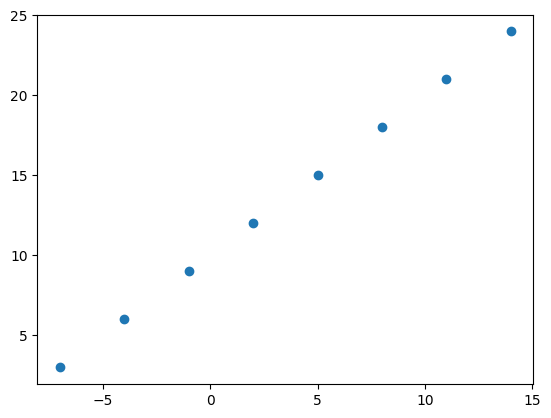

In [3]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
plt.scatter(X,y)

# Input and Output Shape

In [5]:
# Create a demo tensor for our housig price prediction
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0],y[0]

(-7.0, 3.0)

In [6]:
# Checking the shape of input and output
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
# Since both input and output are now scalers in this problem
X[0].ndim

0

In [8]:
# Turing Numpy Array into Tensors
X = tf.constant(X)
y = tf.constant(y)

In [9]:
X.shape, y.shape
X.ndim

1

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

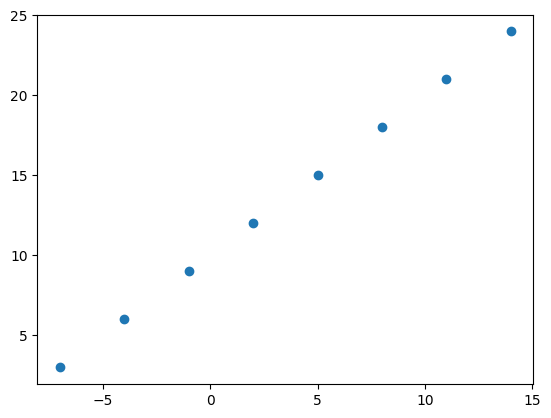

In [11]:
plt.scatter(X,y)

### so we have figured that we will have only 1 input feature and 1 output feature(regression)

# Steps in Modeling with TensorFlow
* **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
* **Compiling a model** - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
* **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [7]:
#X = tf.reshape(X,shape=[X.shape[0],1])
X

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])

In [8]:
# Create the model using the sequential API
"""
We can provide list of model structure as given below as well as we can add sequentially my calling add method of keras class.
"""
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1,input_shape=(1,))
])


# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 429ms/step - loss: 20.4952 - mae: 20.4952
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 20.2139 - mae: 20.2139
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 19.9327 - mae: 19.9327
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 19.6514 - mae: 19.6514
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 19.3702 - mae: 19.3702


In [9]:
# Check again X and y
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [10]:
# Lets make predictions
model.predict([11.0])

1/1 [==============================] - 0s 93ms/step


array([[-13.302946]], dtype=float32)

#Improving our model

We add just one neuron and same used for ouput also thats why we are getting worse results.
We can improve the model by altering the steps we took to create the model.
1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [11]:
#1 Lets recreate the model again
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,))
])

#2 Compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])

#Fit the model
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 294ms/step - loss: 18.3787 - mae: 18.3787
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 18.0975 - mae: 18.0975
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 17.8162 - mae: 17.8162
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 17.5350 - mae: 17.5350
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 17.2537 - mae: 17.2537
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 16.9725 - mae: 16.9725
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 16.6912 - mae: 16.6912
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 16.4100 - mae: 16.4100
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 16.1287 - mae: 16.1287
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 15.8475 - mae: 15.8475
Epoch 11/100
1/1 [==============================] - 0

In [12]:
# Lets see our data first
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [13]:
# Lets again do prediction
model.predict([17.0])

1/1 [==============================] - 0s 97ms/step


array([[29.378572]], dtype=float32)

In [14]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1,input_shape=(1,)),
    tf.keras.layers.Dense(units=50,activation=None),
    tf.keras.layers.Dense(units=1)
])

# Compile the model again with changes
model.compile(loss=tf.keras.losses.MAE, optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=['mae'])

# Fit the model created
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 709ms/step - loss: 14.5814 - mae: 14.5814
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 14.5010 - mae: 14.5010
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 14.4208 - mae: 14.4208
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 14.3408 - mae: 14.3408
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 14.2611 - mae: 14.2611
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 14.1815 - mae: 14.1815
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 14.1022 - mae: 14.1022
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 14.0231 - mae: 14.0231
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 13.9442 - mae: 13.9442
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 13.8655 - mae: 13.8655
Epoch 11/100
1/1 [==============================] -

In [15]:
# Lets predict the output
model.predict([11.0])

1/1 [==============================] - 0s 100ms/step


array([[21.122175]], dtype=float32)

In [16]:
model.predict([17.0])

1/1 [==============================] - 0s 35ms/step


array([[32.047382]], dtype=float32)

**Warning**: What do you notice in previous 2 predictions?. The model predicts the 11's answer exactly correct but 17's wrong. Because the Model gets overfitted during training and memorizes the data points

# Evaluating the Model
In practice, a typical workflow you'll go through when building neural networks is:

Build a model  -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
When it comes to evaluation... there are 3 words you should memorize:

"Visualize, visualize, visualize"

It's a good idea to visualize:

* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

#Making the Bigger Data

In [17]:
data = tf.range(-100,100,4)

In [18]:
data

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
# Labeling the data with specific pattern
y = data+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

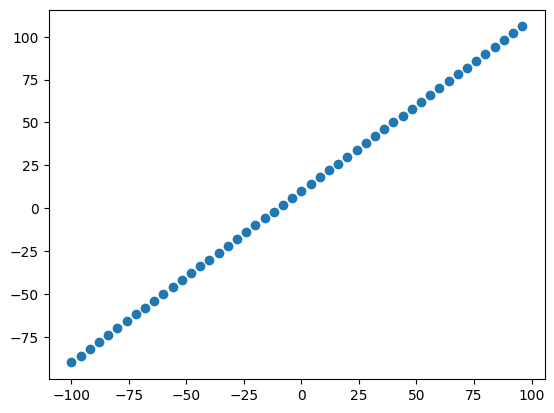

In [20]:
# Viualize the data
plt.scatter(data,y)

In [21]:
X_train = data[:40]
y_train = y[:40]
X_test = data[40:]
y_test = y[40:]

In [22]:
X_train = tf.reshape(tf.constant(X_train),shape=(40,1))
X_train.shape

TensorShape([40, 1])

In [23]:
X_test = tf.reshape(tf.constant(X_test),shape=(10,1))
X_test

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[60],
       [64],
       [68],
       [72],
       [76],
       [80],
       [84],
       [88],
       [92],
       [96]], dtype=int32)>

# The 3 Sets
* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [24]:
len(X_train), len(X_test)

(40, 10)

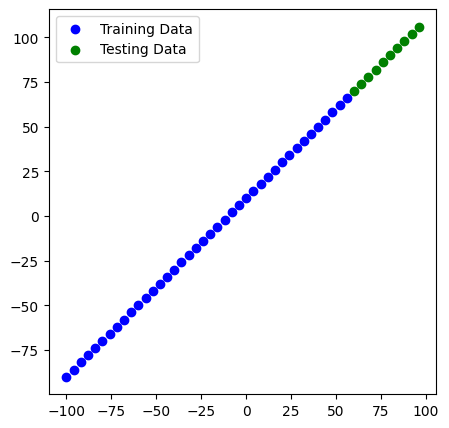

In [25]:
# Plotting Testing and Training data
plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train,c='b',label="Training Data")
plt.scatter(X_test,y_test,c='g',label="Testing Data")
plt.legend()

In [28]:
# Let's create a neural network for our model
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1,name="input_layer"),
    tf.keras.layers.Dense(units=1,name="output_layer")
],name="MyModel")

model.compile(loss=tf.keras.losses.MAE,optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 57.8723 - mae: 57.8723
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 40.8363 - mae: 40.8363
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 32.0037 - mae: 32.0037
Epoch 4/100
2/2 [==============================] - 0s 22ms/step - loss: 11.8560 - mae: 11.8560
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 17.1087 - mae: 17.1087
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 12.0038 - mae: 12.0038
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 11.2629 - mae: 11.2629
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0890 - mae: 11.0890
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 40.1413 - mae: 40.1413
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 27.5665 - mae: 27.5665
Epoch 11/100
2/2 [==============================] - 0s

# Visualize the Model

In [29]:
model.summary()

Model: "MyModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Total params** - total number of parameters in the model.
**Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
**Non-trainable params** - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during transfer learning).
📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

🛠 **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling model.summary().

In [54]:
#Lets fit the model to the data
model.fit(X_train,y_train,epochs=100,verbose=0)

In [75]:
# Let's plot the model
from tensorflow.keras.utils import plot_model

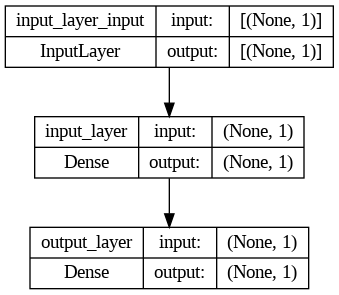

In [56]:
plot_model(model=model,show_shapes=True)

# Visualizing our Model's Predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred (ground truth versus your model's predictions).

In [30]:
# Make Some Predictions
y_predictions = model.predict(X_test)
y_predictions

1/1 [==============================] - 0s 68ms/step


array([[ 76.6897  ],
       [ 81.69184 ],
       [ 86.693985],
       [ 91.69611 ],
       [ 96.69826 ],
       [101.700386],
       [106.70253 ],
       [111.70467 ],
       [116.7068  ],
       [121.70895 ]], dtype=float32)

🔑 Note: If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [31]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [32]:
# Making Plot predictions
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_predictions):
  plt.figure(figsize=(5,5))

  plt.scatter(train_data,train_labels,c='b',label="Training Data")
  plt.scatter(test_data,test_labels,c='g',label="Testing Data")
  plt.scatter(test_data,predictions,c='r',label="Predictions")
  plt.legend()
  plt.show()

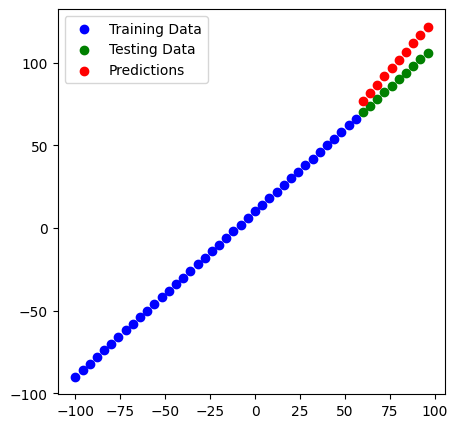

In [33]:
plot_predictions(X_train,y_train,X_test,y_test,y_predictions)

# Evaluting our model's predictions with regression evaluation metrics
Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [34]:
# Evaluating metrics
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 142ms/step - loss: 11.1993 - mae: 11.1993


[11.199323654174805, 11.199323654174805]

In [35]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=y_predictions)

In [36]:
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.186182, 10.923264, 10.      , 10.339223, 11.879303, 14.620232,
       18.70253 , 23.704674, 28.706802, 33.708946], dtype=float32)>

In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [38]:
y_predictions = tf.squeeze(tf.constant(y_predictions))
y_predictions

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.6897  ,  81.69184 ,  86.693985,  91.69611 ,  96.69826 ,
       101.700386, 106.70253 , 111.70467 , 116.7068  , 121.70895 ],
      dtype=float32)>

In [39]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=y_predictions)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=11.199324>

In [40]:
# Mean Square Error
m = tf.metrics.MeanSquaredError()
m.update_state(y_test,y_predictions)
m.result().numpy()

133.71016

# Running experiments to improve our model
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
Train for longer - give your model more of a chance to find patterns in the data.
Let's do 3 modelling experiments:

1. model_1 - same as the original model, 1 layer, trained for 100 epochs
2. model_2 - 2 layers, trained for 100 epochs
3. model_3 - 2 layers, trained for 500 epochs
**Build model_1**

In [41]:
# Creating a Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
],name="Model_1")

# Compile the Model
model_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])

model_1.fit(X_train,y_train,epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 44.0539 - mae: 44.0539
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 14.0794 - mae: 14.0794
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 12.9736 - mae: 12.9736
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 7.9896 - mae: 7.9896
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 12.7591 - mae: 12.7591
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 7.8984 - mae: 7.8984
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 12.1559 - mae: 12.1559
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 7.8532 - mae: 7.8532
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 19.1746 - mae: 19.1746
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 14.0881 - mae: 14.0881
Epoch 11/100
2/2 [==============================] - 0s 7ms/step -

1/1 [==============================] - 0s 45ms/step


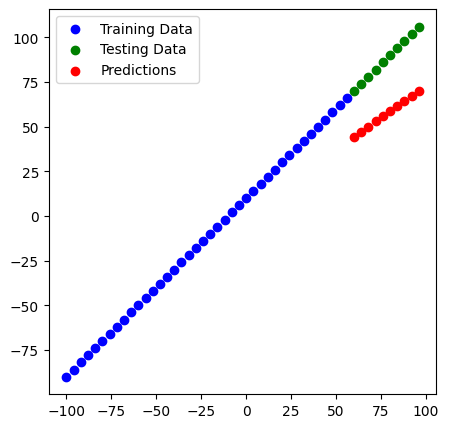

In [42]:
y_pred = model_1.predict([X_test])
plot_predictions(X_train,y_train,X_test,y_test,y_pred)

In [43]:
model_1.evaluate(X_test,y_test)

1/1 [==============================] - 0s 103ms/step - loss: 30.6990 - mae: 30.6990


[30.698965072631836, 30.698965072631836]

In [67]:
mae_1 = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(tf.constant(y_pred)))
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=30.698965>

In [45]:
y_pred

array([[44.376854],
       [47.248894],
       [50.120934],
       [52.992973],
       [55.865013],
       [58.737053],
       [61.609097],
       [64.48114 ],
       [67.35317 ],
       [70.22522 ]], dtype=float32)

In [68]:
mse_1 = tf.metrics.mean_squared_error(y_test,tf.squeeze(tf.constant(y_pred)))
mse_1

<tf.Tensor: shape=(), dtype=float32, numpy=952.92285>

**Build model_2**

2 dense layers, trained for 100 epochs

In [52]:
# Creating again model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10,activation='linear'),
    tf.keras.layers.Dense(units=1,activation='linear')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=['mae'])

# Fitting the Model
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 35.5123 - mae: 35.5123
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 35.0697 - mae: 35.0697
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 34.6443 - mae: 34.6443
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 34.2082 - mae: 34.2082
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 33.7833 - mae: 33.7833
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 33.3629 - mae: 33.3629
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 32.9331 - mae: 32.9331
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 32.4922 - mae: 32.4922
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 32.0790 - mae: 32.0790
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 31.6649 - mae: 31.6649
Epoch 11/100
2/2 [==============================] - 0s 8ms

In [53]:
### Evaluating the Model
model_2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 159ms/step - loss: 18.4628 - mae: 18.4628


[18.4627742767334, 18.4627742767334]

In [54]:
#Checking the metrics
y_pred2 = model_2.predict([X_test])

1/1 [==============================] - 0s 48ms/step


In [55]:
y_pred2

array([[53.58801 ],
       [57.132282],
       [60.676556],
       [64.22082 ],
       [67.76509 ],
       [71.30936 ],
       [74.85363 ],
       [78.3979  ],
       [81.94218 ],
       [85.48645 ]], dtype=float32)

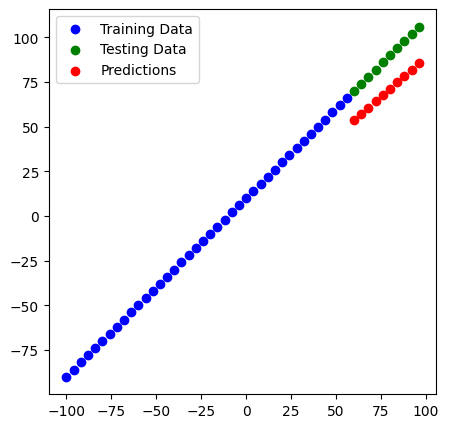

In [56]:
plot_predictions(X_train,y_train,X_test,y_test,y_pred2)

In [69]:
mse_2 = tf.metrics.mean_squared_error(y_test,tf.squeeze(tf.constant(y_pred2)))

In [70]:
mae_2 = tf.metrics.mean_absolute_error(y_test,tf.squeeze(tf.constant(y_pred2)))

**Build model_3**

* 2 layers, trained for 500 epochs

In [65]:
# Again create another model_3

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1,activation='linear'),
    tf.keras.layers.Dense(units=10,activation='linear'),
    tf.keras.layers.Dense(units=10,activation='linear'),
    tf.keras.layers.Dense(units=1,activation='linear')
])

# Compile the Model

model_3.compile(loss=tf.keras.losses.MSE,optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics=['mae'])

# Fitting the Model
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 8ms/step - loss: 1033.1078 - mae: 26.2802
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 806.1334 - mae: 23.1799
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 622.0076 - mae: 20.3476
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 466.4186 - mae: 17.6993
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 345.3692 - mae: 15.4624
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 246.5871 - mae: 13.5756
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 177.0275 - mae: 12.2734
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 125.6179 - mae: 10.9279
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 100.9983 - mae: 10.0354
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 85.0477 - mae: 9.0390
Epoch 11/500
2/2 [==============================] 

1/1 [==============================] - 0s 62ms/step


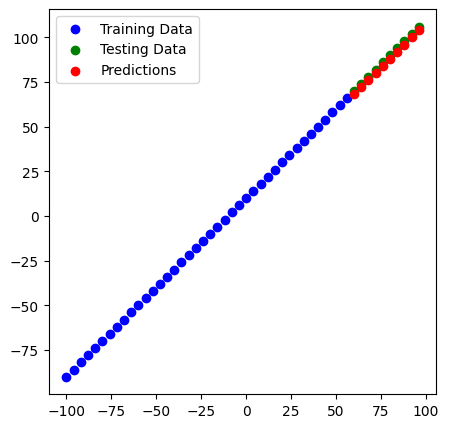

In [66]:
y_pred3 = model_3.predict([X_test])
plot_predictions(X_train,y_train,X_test,y_test,y_pred3)

### Comparing the results of our experiments
We've run a few experiments, let's compare the results.

In [71]:
mae_3 =  tf.metrics.mean_absolute_error(y_test,tf.squeeze(tf.constant(y_pred3)))
mse_3 =  tf.metrics.mean_squared_error(y_test,tf.squeeze(tf.constant(y_pred3)))

In [72]:
import pandas as pd
model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],["model_2",mae_2.numpy(),mse_2.numpy()],["model_3",mae_3.numpy(),mse_1.numpy()]]
model_results = pd.DataFrame(model_results,columns=["Models","MAE",'MSE'])
model_results


,Models,MAE,MSE
0,model_1,30.698965,952.922852
1,model_2,18.462772,342.587433
2,model_3,1.829445,952.922852


Model_3 perform best than othes

In [73]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 143 (572.00 Byte)
Trainable params: 143 (572.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


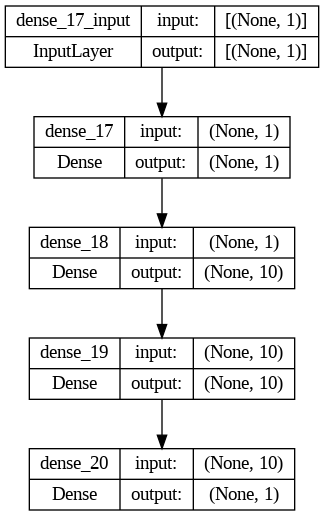

In [76]:
plot_model(model_3,show_shapes=True)

🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

# Tracking your experiments
One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:
* https://www.tensorflow.org/tensorboard a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* https://wandb.ai/site/ - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

# Saving our models
Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1.The SavedModel format.

2.The HDF5 format

In [78]:
# Saving the Model in SavedModel Format
model_3.save("Best_Model_SavedModel_Format")

In [79]:
# Saving the Model into the HDF5 Format
model_3.save("BestModel_HDF5_Format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Loading in a saved model

In [81]:
# Loading the saved model
load_saved_model = tf.keras.models.load_model('Best_Model_SavedModel_Format') # In the same way .h5 model can be loaded and used..
load_saved_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 143 (572.00 Byte)
Trainable params: 143 (572.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
loaded_model = load_saved_model.predict([X_test])
model_3_prediction = model_3.predict([X_test])
loaded_model, model_3_prediction

1/1 [==============================] - 0s 36ms/step


(array([[ 68.356735],
        [ 72.31536 ],
        [ 76.274   ],
        [ 80.23261 ],
        [ 84.19124 ],
        [ 88.14987 ],
        [ 92.10849 ],
        [ 96.06713 ],
        [100.02574 ],
        [103.98437 ]], dtype=float32),
 array([[ 68.356735],
        [ 72.31536 ],
        [ 76.274   ],
        [ 80.23261 ],
        [ 84.19124 ],
        [ 88.14987 ],
        [ 92.10849 ],
        [ 96.06713 ],
        [100.02574 ],
        [103.98437 ]], dtype=float32))